# Week 2

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

## Mean, Variance, Linear Regression, Fitted line

In [5]:
data1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
data2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
data3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
data4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'
df1 = pd.read_csv(data1, sep='\t', header=None, names=['x', 'y'])
df2 = pd.read_csv(data2, sep='\t', header=None, names=['x', 'y'])
df3 = pd.read_csv(data3, sep='\t', header=None, names=['x', 'y'])
df4 = pd.read_csv(data4, sep='\t', header=None, names=['x', 'y'])

df_lst = [df1, df2, df3, df4]

In [6]:
# Calculate the means
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-mean: {np.mean(df['x']):.2f} | y-mean: {np.mean(df['y']):.2f}")

Dataset 1 x-mean: 9.00 | y-mean: 7.50
Dataset 2 x-mean: 9.00 | y-mean: 7.50
Dataset 3 x-mean: 9.00 | y-mean: 7.50
Dataset 4 x-mean: 9.00 | y-mean: 7.50


In [7]:
# Calculate the variances 
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-var: {np.var(df['x']):.3f} | y-var: {np.var(df['y']):.3f}")

Dataset 1 x-var: 10.000 | y-var: 3.752
Dataset 2 x-var: 10.000 | y-var: 3.752
Dataset 3 x-var: 10.000 | y-var: 3.748
Dataset 4 x-var: 10.000 | y-var: 3.748


In [8]:
# calculate the Pearson correlation between x and y values for all four data sets  
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} pearson correlation between x and y: {np.corrcoef(df['x'], df['y'])[0, 1]:.3f}")

Dataset 1 pearson correlation between x and y: 0.816
Dataset 2 pearson correlation between x and y: 0.816
Dataset 3 pearson correlation between x and y: 0.816
Dataset 4 pearson correlation between x and y: 0.817


In [9]:
# Calculate Linear Regression Parameters 
lr_lst = []
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1}")
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
    print(f"y = {slope:.2f}x + {intercept:.2f}")
    
    lr_lst.append(lambda x: slope * x + intercept)


Dataset 1
y = 0.50x + 3.00
Dataset 2
y = 0.50x + 3.00
Dataset 3
y = 0.50x + 3.00
Dataset 4
y = 0.50x + 3.00


**Comment: We observe that the statistical measures are almost exactly the same for all datasets. The straight line (linear regression) fit also provided the same line for each dataset.**

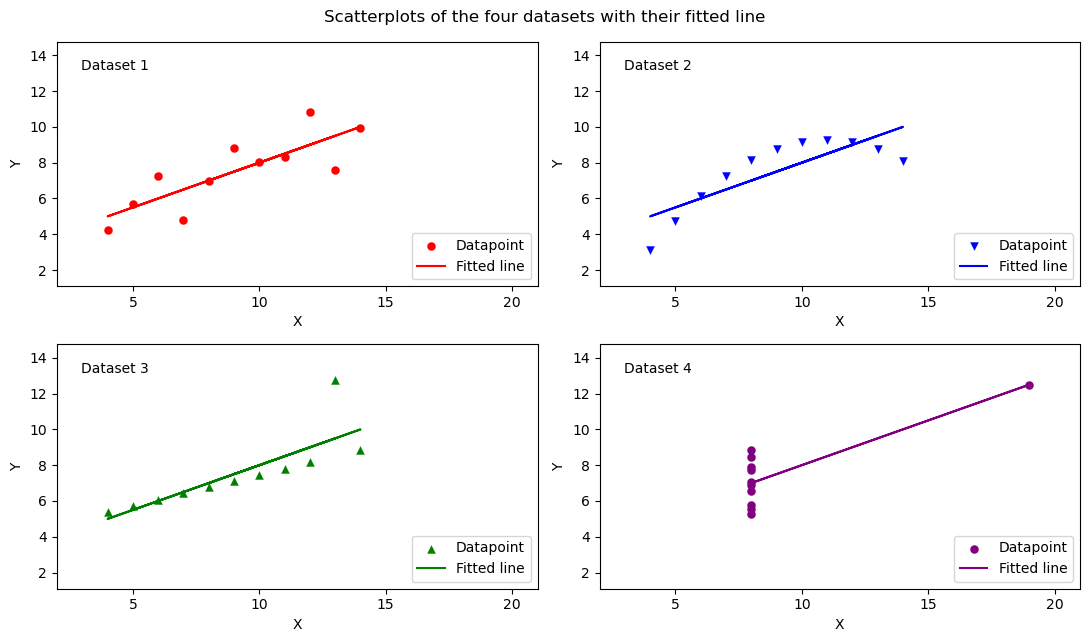

In [12]:
titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]
markers = ["o", "v", "^", "o"]
colors = ["red", "blue", "green", "purple"]
labels = ['Datapoint', 'Datapoint', 'Datapoint', 'Datapoint']

x_min = min(min(data['x']) for data in df_lst)
x_max = max(max(data['x']) for data in df_lst)
y_min = min(min(data['y']) for data in df_lst)
y_max = max(max(data['y']) for data in df_lst)


fig = plt.figure(figsize = (11,6.5))

for i, data in enumerate(df_lst):

    #Creating a subplot spaceholder 
    ax = fig.add_subplot(2, 2, i+1)

    # Scatter plot
    plt.scatter(data['x'], data['y'], marker = markers[i], color = colors[i], linewidths=0.1, label = labels[i])

    # Regression line 
    a, b = np.polyfit(data['x'], data['y'], 1)
    plt.plot(data['x'], data['x']*a+b, color = colors[i], label = f"Fitted line")

    # Legend
    ax.legend(loc = 4)

    # Set subplots titles     
    ax.set_title(titles[i], x = 0.05, y=0.85,  loc = "left", fontsize =10) # set indentation 'left' and x, y added/subtracted, compared to the default values
    
    # Set x,y axes numbering
    plt.xticks(np.arange(0, x_max+2, 5))
    plt.yticks(np.arange(0, y_max+2, 2))

    # Set x and y limits 
    ax.set_xlim(x_min-2, x_max+2)
    ax.set_ylim(y_min-2, y_max+2)

    # Set x and y labels 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Make space between the different rows of plots 
    plt.subplots_adjust(hspace = 0.2, wspace = 0.2) 

    # set the inner margins between plot values and plot
    plt.margins(y = 0.55, x = 0.05) 

    fig.suptitle('Scatterplots of the four datasets with their fitted line')

    fig.tight_layout()

**Comment: The point of the exercise is to show that even if all the numbers indicate that this is the SAME dataset. When we visualize the datapoints, we quickly see that the datasets are NOT the same. Actually they differ quite significantly from each other. Therefore, it is not enough to just look at the statistical measures to identify and explain datasets but we must also use qualitative visualization techniques.**